<a href="https://colab.research.google.com/github/dewoller/uofl_seminars/blob/main/uofl_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:



# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import statistical functions from scipy
from scipy.stats import randint

# Import machine learning models and evaluation metrics from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz

# Import visualization libraries
from IPython.display import Image
import graphviz

# Import function for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder

bank_data = pd.read_csv("bank-marketing.csv", sep=";")
# Convert categorical variables to one-hot encoding
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'default'])
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']
# Convert the target variable to numeric values
le = LabelEncoder()
y = le.fit_transform(y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)




param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# Create a random forest classifier
rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist , n_iter=5, cv=5)
# Fit the random search object to the data
rand_search.fit(X_train, y_train)


# Create a variable for the best model
best_rf = rand_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
Best hyperparameters: {'max_depth': 4, 'n_estimators': 234}

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)






X= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Y= [0 0 0 0 0 0 0 0 0 0]


In [3]:

# Split the dataset into training and testing sets
# 70% of data is used for training and 30% for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)



X_train:  (105, 4)
X_test:   (45, 4)


In [4]:
# Create a Random Forest Classifier
# n_estimators specifies the number of trees in the forest
# random_state ensures reproducibility of the model's results
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier with the training data
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
predictions = clf.predict(X_test)

# Calculate and print the accuracy of the model on the test data
# Accuracy is the ratio of correctly predicted observations to the total observations
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


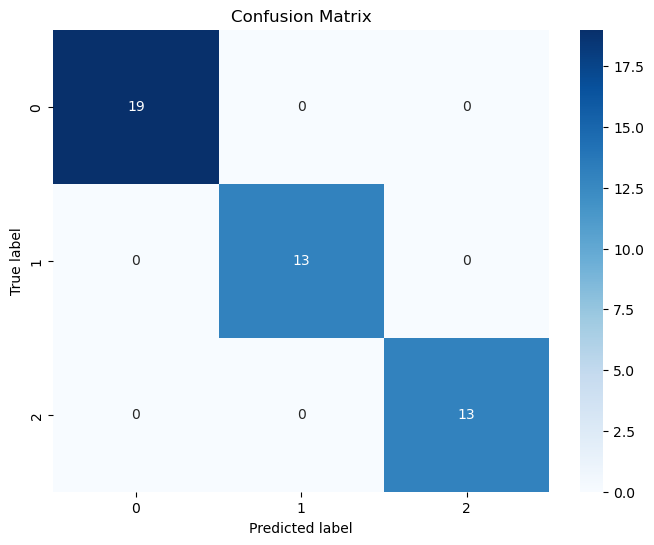

In [5]:

# Generate a confusion matrix to evaluate the performance of the classification
# Confusion matrix provides insights into correct and incorrect predictions
cm = confusion_matrix(y_test, predictions)
# Plot the confusion matrix using seaborn for better visualization
# 'fmt="d"' formats the values as integers
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



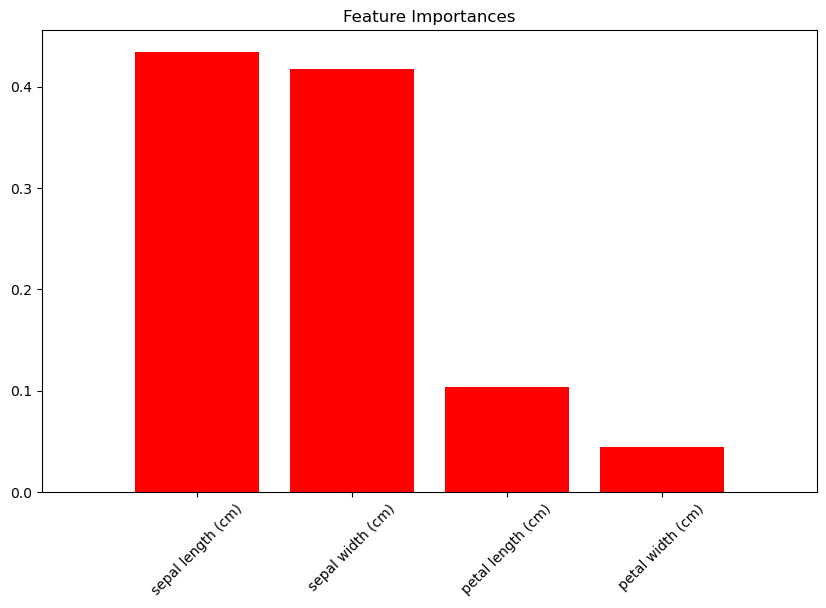

In [6]:
# Analyze feature importances determined by the Random Forest model
feature_importances = clf.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Plot the feature importances
# This graph shows which features are most important in the model's decision-making
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
# Set the x-ticks to correspond to the feature names, rotating them for better readability
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=45)
# Set the limits of the x-axis
plt.xlim([-1, X.shape[1]])
plt.show()